# GSVD

This notebook illustrates the embedding of a graph through the [generalized singular value decomposition](https://en.wikipedia.org/wiki/Generalized_singular_value_decomposition) of the adjacency matrix. 

In [1]:
%matplotlib inline
import numpy as np

import networkx as nx
import sknetwork as skn

In [2]:
COLORS = np.array(['r', 'b', 'g', 'c', 'm', 'y'])

## Undirected graphs

**Loading**

In [3]:
graph = skn.data.KarateClub()
adjacency = graph.adjacency
labels = graph.labels

**Embedding**

In [4]:
gsvd = skn.embedding.GSVD(3, normalize=False)
embedding = gsvd.fit_transform(adjacency)
embedding.shape

(34, 3)

**Visualization**

In [5]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


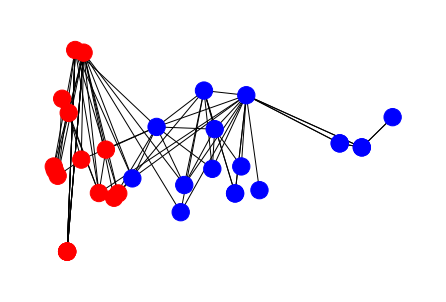

In [6]:
# skip first component of the embedding
nx.draw(graph, pos=embedding[:,1:], node_color=COLORS[labels])

**Metrics**

In [7]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.293795138937445

**Parameters**

In [8]:
# embedding dimension
gsvd = skn.embedding.GSVD(n_components=10)
gsvd.fit(adjacency)

GSVD(n_components=10, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, factor_singular=0.0, normalize=True, solver=LanczosSVD())

In [9]:
# distribution of singular values over the embedding
gsvd = skn.embedding.GSVD(factor_col = 0)
gsvd.fit(adjacency)

GSVD(n_components=2, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0, factor_singular=0.0, normalize=True, solver=LanczosSVD())

In [10]:
# solver
gsvd = skn.embedding.GSVD(solver='halko')
gsvd.fit(adjacency)

GSVD(n_components=2, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, factor_singular=0.0, normalize=True, solver=HalkoSVD(n_oversamples=10, n_iter='auto', transpose='auto', power_iteration_normalizer='auto', flip_sign=True))

## Directed graphs

**Loading**

In [11]:
graph = skn.data.Painters()
adjacency = graph.adjacency
names = graph.names

**Embedding**

In [12]:
# embedding of the graph considered as bipartite (each node considered twice)
gsvd = skn.embedding.GSVD(3)
gsvd.fit(adjacency)

GSVD(n_components=3, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, factor_singular=0.0, normalize=True, solver=LanczosSVD())

In [13]:
embedding = gsvd.embedding_
embedding.shape

(14, 3)

**Visualization**

In [14]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())

In [15]:
names_dict = {i:name for i, name in enumerate(names)}

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


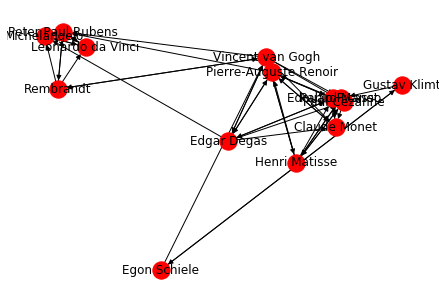

In [16]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos=embedding[:,1:], node_color=COLORS[0], labels=names_dict)

**Metrics**

In [17]:
skn.embedding.cosine_modularity(adjacency, embedding)

0.08971069826391698

## Bipartite graphs

**Loading**

In [18]:
graph = skn.data.MovieActor()
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

**Embedding**

In [19]:
gsvd = skn.embedding.GSVD(3, normalize=False)
gsvd.fit(biadjacency)

GSVD(n_components=3, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, factor_singular=0.0, normalize=False, solver=LanczosSVD())

In [20]:
embedding_row = gsvd.embedding_row_
embedding_row.shape

(15, 3)

In [21]:
embedding_col = gsvd.embedding_col_
embedding_col.shape

(16, 3)

**Visualization**



In [22]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [23]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [24]:
n1, n2 = biadjacency.shape
embedding = np.vstack((embedding_row, embedding_col))

In [25]:
colors = n1 * ['r'] + n2 * ['b']

In [26]:
names_dict = {i: movie for i, movie in enumerate(movies)}
names_dict.update({n1 + i: actor for i, actor in enumerate(movies)})

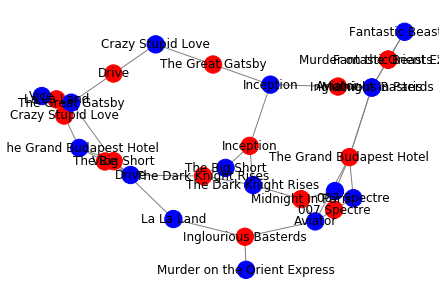

In [27]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, embedding[:,1:], node_color=colors, labels=names_dict, edge_color='grey')